In [1]:
import numpy as np 
import pandas as pd 
import tensorflow as tf
from tensorflow import keras
from sklearn.model_selection import train_test_split
from scipy.stats import reciprocal
from sklearn.model_selection import RandomizedSearchCV
import os
os.environ["TF_CPP_MIN_LOG_LEVEL"] = "2"

# Importing the Dataset

In [2]:
df = pd.read_csv('mushrooms.csv')

df.head()

,class,cap-shape,cap-surface,cap-color,bruises,odor,gill-attachment,gill-spacing,gill-size,gill-color,...,stalk-surface-below-ring,stalk-color-above-ring,stalk-color-below-ring,veil-type,veil-color,ring-number,ring-type,spore-print-color,population,habitat
0,p,x,s,n,t,p,f,c,n,k,...,s,w,w,p,w,o,p,k,s,u
1,e,x,s,y,t,a,f,c,b,k,...,s,w,w,p,w,o,p,n,n,g
2,e,b,s,w,t,l,f,c,b,n,...,s,w,w,p,w,o,p,n,n,m
3,p,x,y,w,t,p,f,c,n,n,...,s,w,w,p,w,o,p,k,s,u
4,e,x,s,g,f,n,f,w,b,k,...,s,w,w,p,w,o,e,n,a,g


# Data Cleansing - checking for missing/null values

In [3]:
df.info()

df.isna().sum()

df.drop_duplicates(inplace=True)
df.shape

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8124 entries, 0 to 8123
Data columns (total 23 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   class                     8124 non-null   object
 1   cap-shape                 8124 non-null   object
 2   cap-surface               8124 non-null   object
 3   cap-color                 8124 non-null   object
 4   bruises                   8124 non-null   object
 5   odor                      8124 non-null   object
 6   gill-attachment           8124 non-null   object
 7   gill-spacing              8124 non-null   object
 8   gill-size                 8124 non-null   object
 9   gill-color                8124 non-null   object
 10  stalk-shape               8124 non-null   object
 11  stalk-root                8124 non-null   object
 12  stalk-surface-above-ring  8124 non-null   object
 13  stalk-surface-below-ring  8124 non-null   object
 14  stalk-color-above-ring  

(8124, 23)

# Preperation - setting up the data structures

In [4]:
y = df.pop('class')
y = y.map( {'e': 1, 'p': 0} ).astype(int)

In [5]:
cat_col = df.select_dtypes(include = 'object').columns
df = pd.get_dummies(df , cat_col ,drop_first=True)
X_train, X_test, y_train, y_test = train_test_split( df , y 
                                                    , test_size=0.2 , random_state=True)

In [6]:
X_train.shape

(6499, 95)

In [7]:
y_train.unique()

array([1, 0])

# Creating our ANN model

In [8]:
model_Seq = keras.models.Sequential([
    keras.layers.InputLayer(input_shape=[95]),
    keras.layers.Dense(300, activation="relu"),
    keras.layers.Dense(100, activation="relu"),
    keras.layers.Dense(1 , activation = 'sigmoid')
])

In [9]:
optimizer = keras.optimizers.SGD(learning_rate=0.001)
model_Seq.compile(loss = 'binary_crossentropy' , optimizer = optimizer,metrics=["accuracy"])
checkpoint_cb = keras.callbacks.ModelCheckpoint('model_Seq.h5' , save_best_only=True)

<AxesSubplot:>

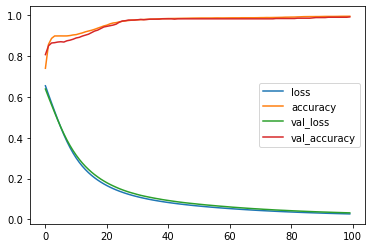

In [10]:
history = model_Seq.fit(X_train, y_train, epochs=100 ,validation_split=0.1 ,verbose= 0 ,callbacks=[checkpoint_cb])
pd.DataFrame(history.history).plot()

In [11]:
model_Seq.evaluate(X_test , y_test)

51/51 [==============================] - 0s 901us/step - loss: 0.0375 - accuracy: 0.9914


[0.037503235042095184, 0.9913846254348755]